# Introduction to Machine Learning
ML is a branch of AI that focus on building an algorithm to train computer to learn from the pass experience in order to predict for future event

## Type of ML
1. Supervised Learning
    a.Regresssion
    b.Classification
    
2. Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
path = "C:/Users/pc/Documents/Lasop/Bike sharing demand/"
startup = pd.read_csv(path + "50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
social = pd.read_csv(path + "Social_Network_Ads.csv")
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Building Classification Model

# model building

In [5]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# split the data into features/input/independent and target/output/dependent
X = social.copy()   # features
y = X.pop("Purchased")   # target
X.drop(columns=["User ID"], inplace=True)

In [7]:
X=social[["Gender", "Age", "EstimatedSalary"]]
y = social["Purchased"]

# variable transformation

In [12]:
u = {"color": ["blue", "red", "blue", "green", "black"], 
    "grade":["good", "best", "best", "better", "best"]}
t=pd.DataFrame(u)
t

,color,grade
0,blue,good
1,red,best
2,blue,best
3,green,better
4,black,best


In [15]:
pd.get_dummies(t, columns=["color"])

,grade,color_black,color_blue,color_green,color_red
0,good,0,1,0,0
1,best,0,0,0,1
2,best,0,1,0,0
3,better,0,0,1,0
4,best,1,0,0,0


In [16]:
rel = {"good":0, "better":1, "best":2}
t["grade"].map(rel)

0    0
1    2
2    2
3    1
4    2
Name: grade, dtype: int64

In [17]:
rel = {"Male":0, "Female":1}
X["Gender"] = X["Gender"].map(rel)

C:\Users\pc\AppData\Local\Temp\ipykernel_13208\1343679505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].map(rel)


In [25]:
# spliting into train and validation set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=0.1, random_state=42)

In [26]:
# model buildig
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # creating the instance of the dt
model1 = dt.fit(x_train, y_train)   # train the model

In [27]:
# Evaluate the 
y_pred=model1.predict(x_val)  # predictin from the model

In [28]:
from sklearn.metrics  import accuracy_score
accuracy_score(y_val, y_pred)

0.85

# Different algorithm

In [29]:
from sklearn.ensemble import RandomForestClassifier
sv = RandomForestClassifier()
model2 = sv.fit(x_train, y_train)

In [30]:
y_pred2=model1.predict(x_val)  # predictin from the model

In [31]:
accuracy_score(y_val, y_pred2)

0.85

# Regression Model

In [36]:
# split the data into feature and target
X = startup.copy()
y = X.pop("Profit")

In [40]:
X_2 =pd.get_dummies(X, columns=["State"])

In [41]:
# split the data into train and val
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_2, y, test_size=0.1, random_state=42)

In [43]:
# model the regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_r_1 = lr.fit(x_train, y_train)
model_r_1

LinearRegression()

In [48]:
# evaluate the model
y_r_pred=model_r_1.predict(x_val)

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_r_pred)

6777.573873301619

# Table of Content
1. importation of the packages
2. Data importation
3. Data Accessing
4. Data Cleaning

# 1. importation of the packages


In [1]:
import numpy as np
import pandas as pd

# 2. Data importation

In [2]:
path = "C:/Users/pc/Desktop/1/my project/Done/titanic/"
df = pd.read_csv(path + "train.csv")


# 3. Data Accessing

In [3]:
# print the first five rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# print the last five rows of the dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# show the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the dataframe consist of 12 columns and 891 rows. some of the columns having a missing values that will deal in data cleaning stage

In [6]:
# randomly sample the dataframe
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S


In [7]:
# dimension of the dataframe
df.shape

(891, 12)

In [8]:
# check datatype of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# check for duplicates entries
df.duplicated().sum()

0

# Data Cleaning

In [12]:
# we are using mean to fill the missing value because the age column is numerical
age_mean=round(df.Age.mean(), 0)
df["Age"].fillna(age_mean, inplace=True)

In [13]:
# fill the missing in cabin column with mode because it is a character variable
cabin_mode=df.Cabin.mode()[0]
df.Cabin.fillna(cabin_mode, inplace=True)

In [14]:
Embarked_mode=df.Embarked.mode()[0]
df.Embarked.fillna(Embarked_mode, inplace=True)

In [15]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [16]:
y = lambda x: x.split()[1].strip('.').strip(",")

In [17]:
df["Name"].apply(y)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [18]:
df["Title"] = df["Name"].apply(y)

In [58]:
all_title=["Mr", "Miss", "Mrs", "Master", "Dr", "Rev" ]
for i in df.Title:
    if i not in all_title:
        df.Title.replace(i, "others", inplace=True)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr


# Data Exploration

# Uni-variate analysis for categorical variable


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# analysis survived column
survived_anal=df["Survived"].value_counts()
survived_anal.index = ["Dead", "Alive"]
survived_anal

Dead     549
Alive    342
Name: Survived, dtype: int64

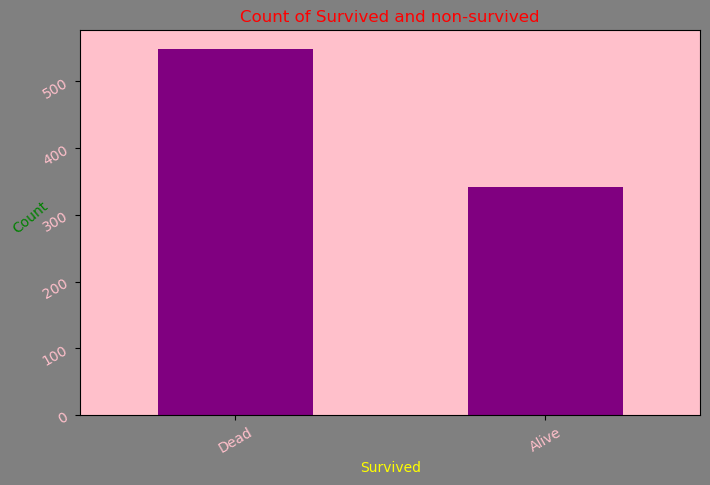

In [102]:
# pandasplot for unvariate analysis
fig, ola = plt.subplots(figsize=(8, 5), facecolor="grey")
ola.set_facecolor("pink")
survived_anal.plot(kind="bar", ax=ola, color="purple")   # pandasplot
plt.title("Count of Survived and non-survived", color="red")
plt.ylabel("Count", color="green", rotation=40)
plt.xlabel("Survived", color="yellow")
plt.xticks(rotation=30, color="pink")
plt.yticks(rotation=30, color="pink")
plt.show()

In [ ]:
# seaborn
# matplot
# pandasplot

In [104]:
survived_anal

Dead     549
Alive    342
Name: Survived, dtype: int64

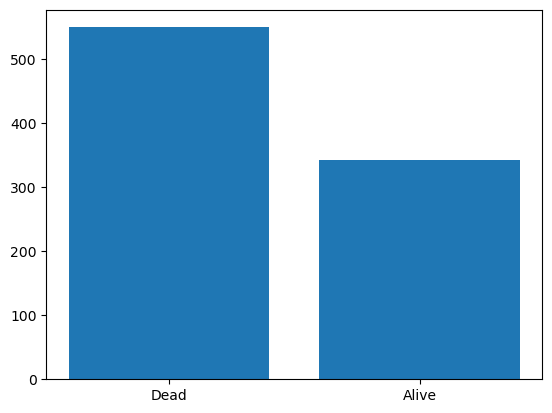

In [122]:
# uisng matplot
plt.bar(x=survived_anal.index, height=survived_anal.values)
plt.show()

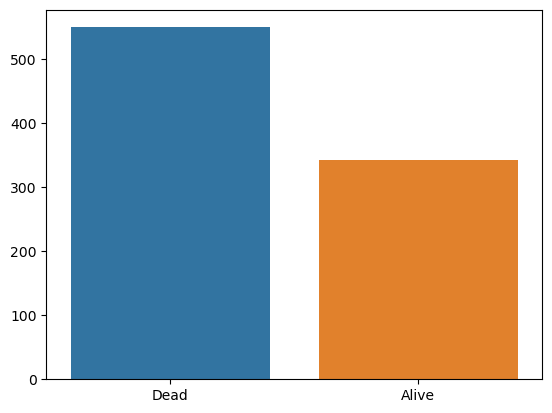

In [124]:
sns.barplot(x=survived_anal.index, y=survived_anal.values)
plt.show()

In [128]:
# convert the age from float to int
df["Age"]= df["Age"].astype(int)

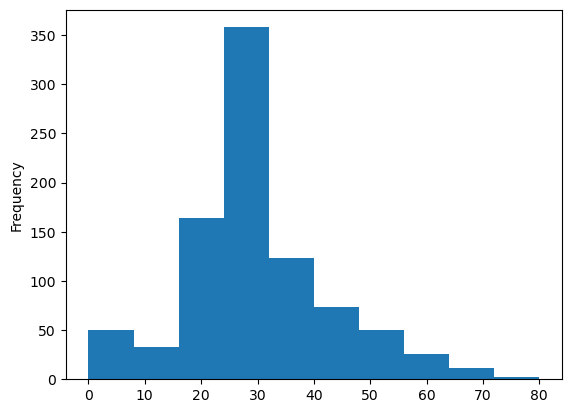

In [132]:
df["Age"].plot(kind="hist")
plt.show()

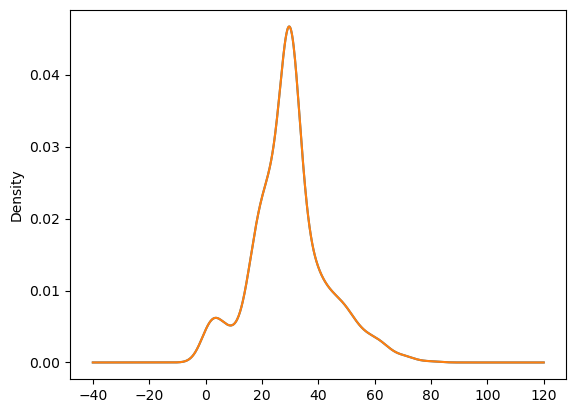

In [135]:
# for numerical variable what we need to know is distribution of the data
df["Age"].plot(kind="kde")
plt.show()


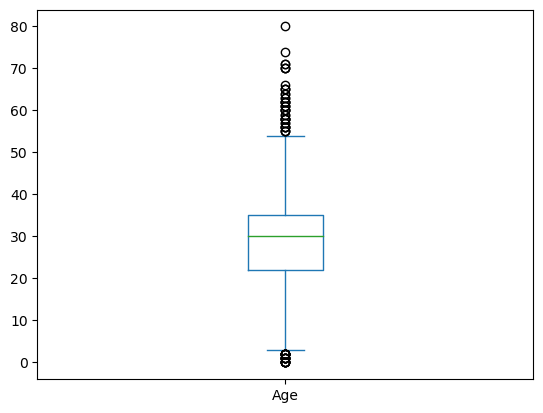

In [131]:
df["Age"].plot(kind="box")
plt.show()

# Bivariate analysis

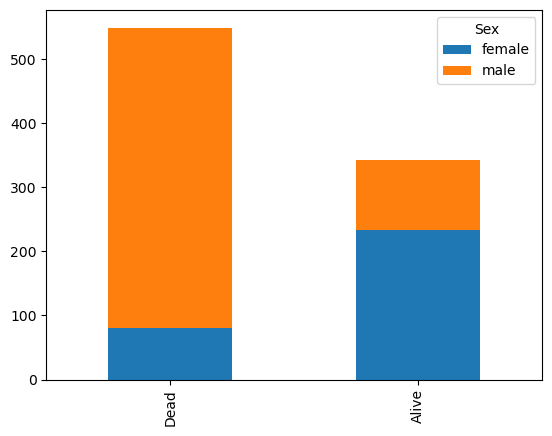

In [143]:
# cat vs cat
tosin=pd.crosstab(index=df["Survived"], columns=df["Sex"], values=df["Sex"], aggfunc="count")
tosin.index = ["Dead", "Alive"]
tosin.plot(kind="bar", stacked=True)
plt.show()

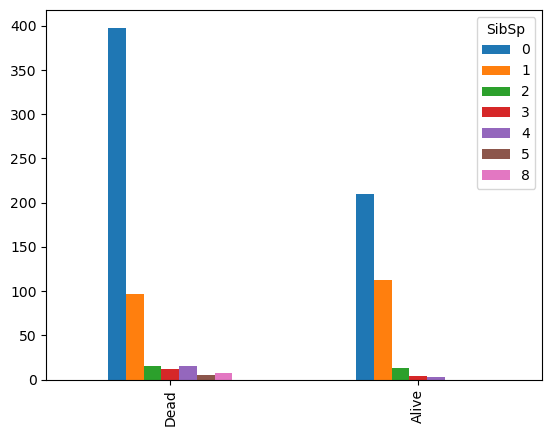

In [146]:
tosin=pd.crosstab(index=df["Survived"], columns=df["SibSp"], values=df["SibSp"], aggfunc="count")
tosin.index = ["Dead", "Alive"]
tosin.plot(kind="bar", stacked=False)
plt.show()

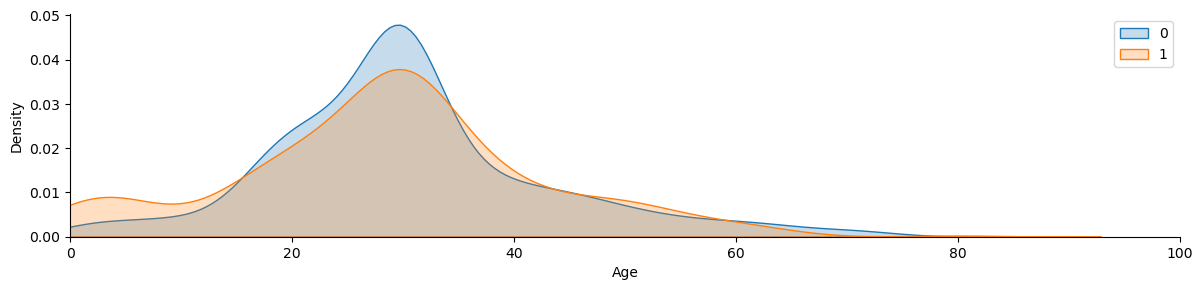

In [158]:
# cat vs num
ola = sns.FacetGrid(data=df, hue="Survived", aspect=4)
ola.map(sns.kdeplot, "Age", shade=True)
plt.legend()
plt.xlim(0, 100)
plt.show()

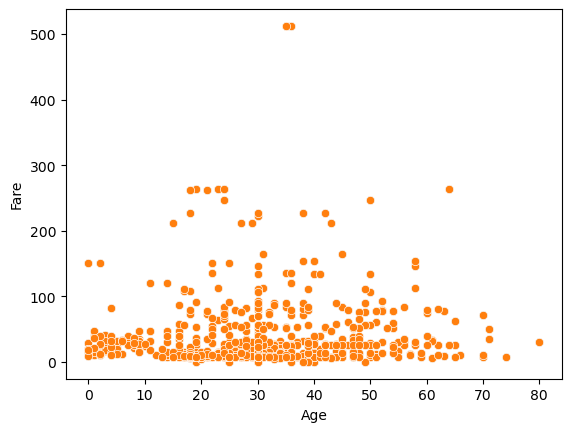

In [160]:
# num vs num
sns.scatterplot(x=df["Age"], y=df["Fare"])
plt.show() 

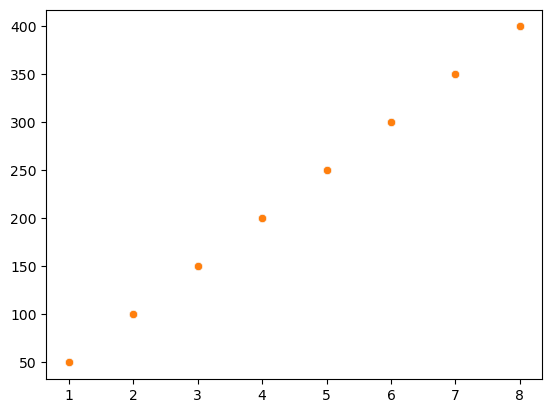

In [162]:
mary = [1,2,3,4,5,6,7,8]
esther = [50,100, 150, 200, 250, 300, 350, 400]
sns.scatterplot(x=mary, y=esther)
plt.show()

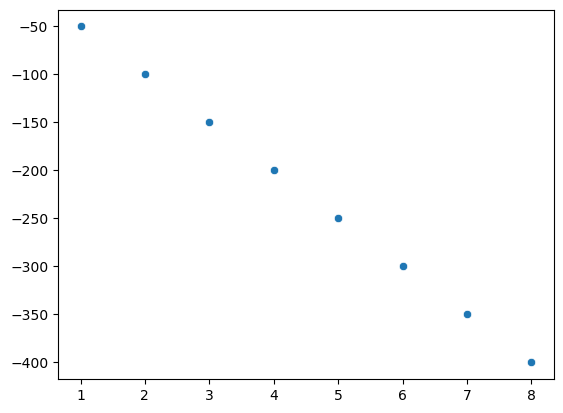

In [163]:
mary = [1,2,3,4,5,6,7,8]
esther = [-50,-100, -150, -200, -250,- 300, -350, -400]
sns.scatterplot(x=mary, y=esther)
plt.show()

In [136]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30,1,2,W./C. 6607,23.4500,B96 B98,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr


In [4]:
hh = ["python", "is", "fun", "but", "require", "alot", "of", "practicing", "to ", "master", "it"]
ff="".join(hh)

In [5]:
len(ff)

48

# Function



In [6]:
# defining function
def greet(): # non parameter
    print("you're welcome to our school ")

In [7]:
greet()

you're welcome to our school 


In [10]:
# create a function to add any two number

def add_two(e, i):
    total = e + i
    return total

In [12]:
add_two(10, 7)

17

In [16]:
def sec(minute):
    seconds = minute / 60
    return seconds

In [18]:
sec(120)

2.0

In [24]:
esther= lambda mary1, mary2: mary1 + mary2

In [25]:
esther(3736, 93)

3829

In [47]:
def all_list(y):
    u =[]
    for elemet in y:
        elemet = int(elemet)
        u.append(elemet)
    all_sum = sum(u)
    return all_sum

k = [2,3,4,56,6,2]
all_list(k)

73

3

In [41]:
"2" = 2

3 8 2 45 7


In [42]:
h

['3', '8', '2', '45', '7']

65

In [21]:
sec = lambda u : u * 60
sec(5)

300

# control flow in python
1. Conditional Statement
    a. if
    b. else
    c. elif

2. Loop statement
    a. for loop
    b. while loop
    
 3. Lopp contol statement
     a. break
     b. continue
     
  4. Error handling statement
      a. try
      b. except

In [2]:
a = 10
if a>12:
    print("we are good to go")
    print("what we can under the block of if can be as you want")

In [4]:
a = 10
if a>12:
    print("we are good to go")
else:
    print("we may need to wait for others")

we may need to wait for others


In [5]:
a = 10
if a>12:
    print("we are good to go")
elif a==10:
    print("some set of people must have gone ")
else:
    print("we may need to wait for others")

some set of people must have gone 


In [9]:
age = int( input("please enter your age to know the age group ") )

if age<=12:
    print("you are a child ")
elif (age>12) and (age<=19):
    print("you are a teenager")
elif (age>19) and (age<=49):
    print("you are an Adult")
else:
    print("you are too old to be here ")


please enter your age to know the age group 99
you are too old to be here 


In [ ]:
string
list
tuple
set
dictionary

In [11]:
name = "olaitan"
for char in name:
    print(char)

o
l
a
i
t
a
n


In [18]:
all_population = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
even_list = []
odd_list = []
for element in all_population:
    if element%2==0:
        even_list.append(element)
    else:
        odd_list.append(element)


In [27]:
all_population = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
even_list = []
odd_list = []
for element in all_population:
    if element==12:
        break
    if element%2==0:
        even_list.append(element)
        
    else:
        odd_list.append(element)


In [28]:
all_population = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
even_list = []
odd_list = []
for element in all_population:
    if element==12:
        continue
    if element%2==0:
        even_list.append(element)
        
    else:
        odd_list.append(element)


In [29]:
even_list

[2, 4, 6, 8, 10, 14, 16, 18, 20]

In [19]:
even_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [20]:
odd_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [21]:
# land= ["Finland", "England", "Holland"]
countries = ["Finland", "England", "china", "Angona", "Holland", "Nigeria", "Portugal"]
land = []
for country in countries:
    if country.endswith("land"):
        land.append(country)

In [ ]:
a=1
while a<=10:
    print("number {} while loop is runing".format(a))
    a+=1

In [8]:
a =1
while True:
    print("number {} while loop is runing".format(a))
    if a>10:
        break
    a+=1

number 1 while loop is runing
number 2 while loop is runing
number 3 while loop is runing
number 4 while loop is runing
number 5 while loop is runing
number 6 while loop is runing
number 7 while loop is runing
number 8 while loop is runing
number 9 while loop is runing
number 10 while loop is runing
number 11 while loop is runing


In [17]:
secret_number =7
guess_time=0
while True:
    if guess_time<=2:
        guess = int(input("enter your guess number "))
        if guess == secret_number:
            print("Bingo!!! you just won yourself a prize")
            break
    guess_time+=1   

enter your guess number 2
enter your guess number 2
enter your guess number 3


KeyboardInterrupt: Interrupted by user

In [32]:
try:
    secret_number =7
    guess_time=0
    while True:
        if guess_time<=2:
            guess = input("enter your guess number ")
            if guess > secret_number:
                print("Bingo!!! you just won yourself a prize")
                break
        guess_time+=1   
except:
    print("olaitan, there is error in your try block")
    

enter your guess number 3
olaitan, there is error in your try block


In [34]:
2 > "3"

TypeError: '>' not supported between instances of 'int' and 'str'

In [ ]:
kkks
kkdkd
kkkd
kkkd
kkd
jjdl
jjdl

In [141]:
import pandas as pd
path = "C:/Users/pc/Documents/Lasop/PowerBI/Data/data/"
df = pd.read_excel(path + "PBI.xlsx")

In [142]:
f=df.PRODUCT.value_counts().index.sort_values() 
for i in df.PRODUCT:
    if i in f[:15]:
        df.PRODUCT.replace(i, "Phone", inplace=True)
    elif i in f[15:26]:
        df.PRODUCT.replace(i, "Laptop", inplace=True)
    elif i in f[26:33]:
        df.PRODUCT.replace(i, "Desktop", inplace=True)
    elif i in f[33:]:
         df.PRODUCT.replace(i, "Notepad", inplace=True)

In [143]:
df.PRODUCT.value_counts()

Phone      277
Notepad    234
Laptop     187
Desktop    134
Name: PRODUCT, dtype: int64

In [144]:
df.loc[df["PRODUCT"]=="Laptop", "Unit Price"] = 710.78
df.loc[df["PRODUCT"]=="Desktop", "Unit Price"] = 500.70
df.loc[df["PRODUCT"]=="Phone", "Unit Price"] = 350.40
df.loc[df["PRODUCT"]=="Notepad", "Unit Price"] = 400.50

In [145]:
df

,DATE,CUSTOMER NAME,PRODUCT,UNIT PRICE ($),QUANTITY,Actual Sales,Country,Region,Unit Price
0,2021-01-01,Customer33,Laptop,156.96,9,1412.64,India,Western,710.78
1,2021-01-01,Customer29,Laptop,141.57,1,141.57,India,South,710.78
2,2021-01-02,Customer31,Notepad,79.92,15,1198.80,India,North,400.50
3,2021-01-02,Customer03,Desktop,119.70,1,119.70,India,Northeast,500.70
4,2021-01-02,Customer05,Phone,15.72,2,31.44,India,Northeast,350.40
...,...,...,...,...,...,...,...,...,...
827,2021-12-30,Customer31,Phone,164.28,13,2135.64,India,North,350.40
828,2021-12-30,Customer33,Notepad,173.88,14,2434.32,India,Western,400.50
829,2021-12-30,Customer21,Desktop,201.28,31,6239.68,South Africa,Export,500.70
830,2021-12-31,Customer32,Phone,48.40,6,290.40,Pakistan,Export,350.40


In [146]:
for i in df["CUSTOMER NAME"]:
    if i in ["Customer14", "Customer34",  "Customer07"]:
        df["CUSTOMER NAME"].replace(i, "Customer33", inplace=True)
    elif i in ["Customer34", "Customer38", "Customer13", "Customer37", "Customer40", "Customer11"]:
        df["CUSTOMER NAME"].replace(i, "Customer22", inplace=True)
    elif i in ["Customer10", "Customer27", "Customer36", "Customer15", "Customer23"]:
        df["CUSTOMER NAME"].replace(i, "Customer18", inplace=True)
    elif i in ["Customer16", "Customer04", "Customer01", "Customer08", "Customer17"]:
        df["CUSTOMER NAME"].replace(i, "Customer21", inplace=True)
    elif i in ["Customer28", "Customer32", "Customer03", "Customer31", "Customer24", "Customer39"]:
        df["CUSTOMER NAME"].replace(i, "Customer05", inplace=True)

In [147]:
df["CUSTOMER NAME"].replace(["Customer21", "Customer18", "Customer05", "Customer22", "Customer33",
                            "Customer25", "Customer06", "Customer30", "Customer12", "Customer02",
                            "Customer26", "Customer19", "Customer20", "Customer29", "Customer09",
                            "Customer35"] 
                            ,[ "James", "Smith", "Richael", "White", "Rasford",
                             "Anthony", "Alice", "Ismail", "Sancho", "Baily",
                             "Fernandez", "Bellamy", "Shaw", "Sallah", "Kola",
                             "Ada"], inplace=True)

In [148]:
df

,DATE,CUSTOMER NAME,PRODUCT,UNIT PRICE ($),QUANTITY,Actual Sales,Country,Region,Unit Price
0,2021-01-01,Rasford,Laptop,156.96,9,1412.64,India,Western,710.78
1,2021-01-01,Sallah,Laptop,141.57,1,141.57,India,South,710.78
2,2021-01-02,Richael,Notepad,79.92,15,1198.80,India,North,400.50
3,2021-01-02,Richael,Desktop,119.70,1,119.70,India,Northeast,500.70
4,2021-01-02,Richael,Phone,15.72,2,31.44,India,Northeast,350.40
...,...,...,...,...,...,...,...,...,...
827,2021-12-30,Richael,Phone,164.28,13,2135.64,India,North,350.40
828,2021-12-30,Rasford,Notepad,173.88,14,2434.32,India,Western,400.50
829,2021-12-30,James,Desktop,201.28,31,6239.68,South Africa,Export,500.70
830,2021-12-31,Richael,Phone,48.40,6,290.40,Pakistan,Export,350.40


In [149]:
df["CUSTOMER NAME"].value_counts()

James        155
Smith        126
Richael      102
White         93
Rasford       83
Anthony       31
Alice         29
Ismail        27
Sancho        25
Baily         25
Fernandez     24
Bellamy       24
Shaw          23
Sallah        22
Kola          22
Ada           21
Name: CUSTOMER NAME, dtype: int64

In [150]:
df.loc[df["CUSTOMER NAME"]=="James", "Supervisor"]= "Ferguson"
df.loc[df["CUSTOMER NAME"]=="Sallah", "Supervisor"]= "Ferguson"
df.loc[df["CUSTOMER NAME"]=="Kola", "Supervisor"]= "Ferguson"
df.loc[df["CUSTOMER NAME"]=="Sancho", "Supervisor"]= "Ferguson"


df.loc[df["CUSTOMER NAME"]=="Smith", "Supervisor"]= "Mark"
df.loc[df["CUSTOMER NAME"]=="White", "Supervisor"]= "Mark"
df.loc[df["CUSTOMER NAME"]=="Fernandez", "Supervisor"]= "Mark"
df.loc[df["CUSTOMER NAME"]=="Ada", "Supervisor"]= "Mark"



df.loc[df["CUSTOMER NAME"]=="Richael", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Shaw", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Bellamy", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Baily", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Ismail", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Alice", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Anthony", "Supervisor"]= "Elon"
df.loc[df["CUSTOMER NAME"]=="Rasford", "Supervisor"]= "Elon"


In [151]:
df.rename(columns={"CUSTOMER NAME": "Sales rep"}, inplace=True)

In [158]:
y = pd.read_csv("in.csv")
yy = pd.read_csv("in1.csv")


In [161]:
u=pd.concat([y, yy], ignore_index=True)

In [163]:
u["DATE"]=pd.to_datetime(u["DATE"])

In [165]:
u.to_csv("sales.csv", index=False)

In [155]:
df.sample(7)

,DATE,Sales rep,PRODUCT,QUANTITY,Country,Region,Unit Price,Supervisor
304,2021-05-06,Rasford,Phone,6,India,Western,350.40,Elon
649,2021-10-06,Sancho,Notepad,17,India,Central,400.50,Ferguson
496,2021-07-27,White,Notepad,25,Mexico,Export,400.50,Mark
258,2021-04-15,Smith,Laptop,3,India,South,710.78,Mark
684,2021-10-24,Smith,Phone,3,India,Western,350.40,Mark
560,2021-08-28,James,Notepad,22,South Africa,Export,400.50,Ferguson
182,2021-03-14,Shaw,Notepad,32,United Kingdom,Export,400.50,Elon


In [153]:
df.drop(columns=["UNIT PRICE ($)", "Actual Sales"], inplace=True)

In [154]:
df.isna().sum()

DATE          0
Sales rep     0
PRODUCT       0
QUANTITY      0
Country       0
Region        0
Unit Price    0
Supervisor    0
dtype: int64

In [156]:
df.to_csv("in.csv", index=False)

In [1]:
import  psycopg2 as ps
import pandas as pd
from psycopg2 import errors as er
import os

password=os.environ.get("password")

# Using PostgreSQL SELECT statement to query data from one column example

In [28]:
try:
    connection = ps.connect(
                user= "postgres",
                password=password,
                database= "dvdRental"   )  # connect to the postgres server
    
    
    cursor = connection.cursor()   #  to be able to perform work on the database

    show_database = "SELECT first_name FROM customer;" 

    cursor.execute(show_database)
    result=cursor.fetchall()
    result_df=pd.DataFrame(result, columns=["First Name"])
    display(result_df)
except ():
    print("error")
#finally:
 #   if connection:
  #      cursor.close()
   #     connection.close()        



,First Name
0,Jared
1,Mary
2,Patricia
3,Linda
4,Barbara
...,...
594,Terrence
595,Enrique
596,Freddie
597,Wade


# 2) Using PostgreSQL SELECT statement to query data from multiple columns example

In [3]:
try:
    multiple_columns= "SELECT first_name, last_name, email FROM customer;"
    cursor.execute(multiple_columns)
    result=cursor.fetchall()
    result_df1= pd.DataFrame(result, columns=["first name", "last name", "email"])
    display(result_df1)
except (Exception, errors):
    print(errors)

,first name,last name,email
0,Jared,Ely,jared.ely@sakilacustomer.org
1,Mary,Smith,mary.smith@sakilacustomer.org
2,Patricia,Johnson,patricia.johnson@sakilacustomer.org
3,Linda,Williams,linda.williams@sakilacustomer.org
4,Barbara,Jones,barbara.jones@sakilacustomer.org
...,...,...,...
594,Terrence,Gunderson,terrence.gunderson@sakilacustomer.org
595,Enrique,Forsythe,enrique.forsythe@sakilacustomer.org
596,Freddie,Duggan,freddie.duggan@sakilacustomer.org
597,Wade,Delvalle,wade.delvalle@sakilacustomer.org


# 3) Using PostgreSQL SELECT statement to query data from all columns of a table example

In [4]:
try:
    multiple_columns= "SELECT * FROM customer;"
    cursor.execute(multiple_columns)
    result=cursor.fetchall()
    result_df1= pd.DataFrame(result, columns=["customer_id", "store_id", "first_name", "last_name", "email", "adddress_id"
                                             , "activate_bool", "created_date", "last_updated", "active"])
    display(result_df1)
except (Exception, errors):
    print(errors)

,customer_id,store_id,first_name,last_name,email,adddress_id,activate_bool,created_date,last_updated,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1
...,...,...,...,...,...,...,...,...,...,...
594,595,1,Terrence,Gunderson,terrence.gunderson@sakilacustomer.org,601,True,2006-02-14,2013-05-26 14:49:45.738,1
595,596,1,Enrique,Forsythe,enrique.forsythe@sakilacustomer.org,602,True,2006-02-14,2013-05-26 14:49:45.738,1
596,597,1,Freddie,Duggan,freddie.duggan@sakilacustomer.org,603,True,2006-02-14,2013-05-26 14:49:45.738,1
597,598,1,Wade,Delvalle,wade.delvalle@sakilacustomer.org,604,True,2006-02-14,2013-05-26 14:49:45.738,1


# select the firstname and lastname as fullname and email from customer's table

In [5]:
try:
    task= "SELECT first_name || ' ' || last_name as fullname, email FROM customer;"
    cursor.execute(task)
    result= cursor.fetchall()
    record=pd.DataFrame(result, columns=["fullname", "email"])
    display(record)
except:
    print(errors)

,fullname,email
0,Jared Ely,jared.ely@sakilacustomer.org
1,Mary Smith,mary.smith@sakilacustomer.org
2,Patricia Johnson,patricia.johnson@sakilacustomer.org
3,Linda Williams,linda.williams@sakilacustomer.org
4,Barbara Jones,barbara.jones@sakilacustomer.org
...,...,...
594,Terrence Gunderson,terrence.gunderson@sakilacustomer.org
595,Enrique Forsythe,enrique.forsythe@sakilacustomer.org
596,Freddie Duggan,freddie.duggan@sakilacustomer.org
597,Wade Delvalle,wade.delvalle@sakilacustomer.org


# ORDER BY
### SELECT the firstname and the lastname of customers and  sort customers by their first names in ascending order:

In [6]:
try:
    task = "SELECT first_name, last_name FROM customer ORDER BY first_name ASC;"
    cursor.execute(task)
    result=cursor.fetchall()
    record = pd.DataFrame(result, columns=["first name", "last name"])
    display(record)
except:
    print(errors)

,first name,last name
0,Aaron,Selby
1,Adam,Gooch
2,Adrian,Clary
3,Agnes,Bishop
4,Alan,Kahn
...,...,...
594,Willie,Howell
595,Wilma,Richards
596,Yolanda,Weaver
597,Yvonne,Watkins


### SELECT the firstname and the lastname of customers and  sort customers by their first names in decending order:

In [7]:
try:
    task = "SELECT first_name, last_name FROM customer ORDER BY first_name DESC;"
    cursor.execute(task)
    result=cursor.fetchall()
    record = pd.DataFrame(result, columns=["first name", "last name"])
    display(record)
except:
    print(errors)

,first name,last name
0,Zachary,Hite
1,Yvonne,Watkins
2,Yolanda,Weaver
3,Wilma,Richards
4,Willie,Markham
...,...,...
594,Alan,Kahn
595,Agnes,Bishop
596,Adrian,Clary
597,Adam,Gooch


# SELECT the firstname and the lastname of the customer and sorting using the firstname in ascending order and the lastname in descenidng order\

In [8]:
try:
    task = "SELECT first_name, last_name FROM customer ORDER BY first_name ASC, last_name DESC;"
    cursor.execute(task)
    result=cursor.fetchall()
    record = pd.DataFrame(result, columns=["first name", "last name"])
    display(record)
except:
    print(errors)

,first name,last name
0,Aaron,Selby
1,Adam,Gooch
2,Adrian,Clary
3,Agnes,Bishop
4,Alan,Kahn
...,...,...
594,Willie,Howell
595,Wilma,Richards
596,Yolanda,Weaver
597,Yvonne,Watkins


# select the firstname, and length of the firstname, and the lastname of the customer and sort by the length of the firstname in descending order

In [9]:
try:
    
    connection = ps.connect(
                user= "postgres",
                password=password,
                database= "dvdRental"   )  # connect to the postgres server
    cursor = connection.cursor()   #  to be able to perform work on the database
    
    task = """SELECT first_name, LENGTH(first_name) as "length of firstname" ,
      last_name FROM customer ORDER BY "length of firstname" DESC;"""
    
    cursor.execute(task)
    result = cursor.fetchall()
    record= pd.DataFrame(result, columns=["first name", "len", "lastname"])
    display(record)
except:
    print(errors)

,first name,len,lastname
0,Christopher,11,Greco
1,Jacqueline,10,Long
2,Constance,9,Reid
3,Katherine,9,Rivera
4,Nathaniel,9,Adam
...,...,...,...
594,Ida,3,Andrews
595,Sue,3,Peters
596,Sam,3,Mcduffie
597,Dan,3,Paine


# select the title and the rating from film table and perform custom sorting in following order R, G and PG-13 using rating column

In [10]:
try:
    task = """SELECT TITLE, rating FROM film  ORDER BY 
            case when rating= 'R' then 1
            when rating = 'G' then 2
             when rating = 'PG-13' THEN 3
            else 4
            end;"""
    
    
    cursor.execute(task)
    result= cursor.fetchall()
    record = pd.DataFrame(result, columns=["title", "rating"])
    display(record)
except:
    print(er)

,title,rating
0,Wild Apollo,R
1,Shrunk Divine,R
2,Kramer Chocolate,R
3,Siege Madre,R
4,Guys Falcon,R
...,...,...
995,Worst Banger,PG
996,Wrath Mile,NC-17
997,Youth Kick,NC-17
998,Zhivago Core,NC-17


In [11]:
try:
    
    connection = ps.connect(
                user= "postgres",
                password=password,
                database= "dvdRental"   )  # connect to the postgres server
    cursor = connection.cursor()   #  to be able to perform work on the database
    
    drop_table = "DROP TABLE IF EXISTS ola"
    
    cursor.execute(drop_table)
    connection.commit()
    
    creat_table = """CREATE TABLE if not exists ola(
    
    num int 
    )"""
    
    cursor.execute(creat_table)
    connection.commit()
    
    insert = "INSERT INTO ola(num) VALUES(1), (2), (NULL), (3), (NULL)"
    cursor.execute(insert)
    connection.commit()
    
    task = "SELECT * FROM ola ORDER BY num NULLS FIRST"
    cursor.execute(task)
    result=cursor.fetchall()
    record = pd.DataFrame(result)
    display(record)
    
    
except:
    print(er)

,0
0,NaN
1,NaN
2,1.0
3,2.0
4,3.0


# Where Clause
Is used to filter rows of a table base on the given condition

# Where Clause with equal sign

In [12]:
import psycopg2 as ps
from psycopg2 import errors as er
import pandas as pd
try:
    
    connection = ps.connect(
                user= "postgres",
                password=password,
                database= "dvdRental"   )  # connect to the postgres server
    cursor = connection.cursor()   #  to be able to perform work on the database
    
    task = "SELECT first_name, last_name FROM customer WHERE first_name='Jamie'"
    cursor.execute(task)
    record = cursor.fetchall()
    df = pd.DataFrame(record, columns=["first name", "last name"])
    display(df)
    
except:
    print(er)

,first name,last name
0,Jamie,Rice
1,Jamie,Waugh


# Where Clause with and Operator
select the firstname and the lastname of the customer whose firstname is Rice and the lastname is jamie

In [13]:
try:
    connection = ps.connect(
                user= "postgres",
                password= password,
                database = "dvdRental"
    )
    
    cursor = connection.cursor()
    
    task = "SELECT last_name, first_name FROM Customer WHERE first_name='Jamie' AND last_name='Rice';"
    cursor.execute(task)
    record = cursor.fetchall()
    df = pd.DataFrame(record,columns=[ "last name", "first name",])
    display(df)
except:
    print(er)

,last name,first name
0,Rice,Jamie


In [14]:
# finds customers whose first names start with the letter A and contains 3 to 5 characters 

try:
    connection = ps.connect(
        database="dvdRental",
        password=password,
        user= "postgres"
    )
    
    cursor = connection.cursor()
    task = """SELECT first_name, LENGTH(first_name) as "kkk l" FROM customer WHERE first_name LIKE 'A%' AND LENGTH(first_name) BETWEEN 3 AND 5"""
    cursor.execute(task)
    record = cursor.fetchall()
    result = pd.DataFrame(record, columns=["first name", "length of first name"])
    display(result)
    
except:
    print(er)

,first name,length of first name
0,Amy,3
1,Anna,4
2,Ann,3
3,Alice,5
4,Anne,4
5,Annie,5
6,Anita,5
7,Amber,5
8,April,5
9,Ana,3


# LIMIT

In [15]:
# finds customers whose first names start with the letter A and contains 3 to 5 characters 

try:
    connection = ps.connect(
        database="dvdRental",
        password=password,
        user= "postgres"
    )
    
    cursor = connection.cursor()
    task = """SELECT film_id, title, release_year FROM film ORDER BY film_id LIMIT 5;"""
    cursor.execute(task)
    record = cursor.fetchall()
    result = pd.DataFrame(record, columns=["film_id", "title", "release_year"])
    display(result)
    
except:
    print(er)

,film_id,title,release_year
0,1,Academy Dinosaur,2006
1,2,Ace Goldfinger,2006
2,3,Adaptation Holes,2006
3,4,Affair Prejudice,2006
4,5,African Egg,2006


In [16]:
# finds customers whose first names start with the letter A and contains 3 to 5 characters 

try:
    connection = ps.connect(
        database="dvdRental",
        password=password,
        user= "postgres"
    )
    
    cursor = connection.cursor()
    task = """SELECT film_id, title, release_year FROM film ORDER BY film_id LIMIT 5 OFFSET 3;"""
    cursor.execute(task)
    record = cursor.fetchall()
    result = pd.DataFrame(record, columns=["film_id", "title", "release_year"])
    display(result)
    
except:
    print(er)

,film_id,title,release_year
0,4,Affair Prejudice,2006
1,5,African Egg,2006
2,6,Agent Truman,2006
3,7,Airplane Sierra,2006
4,8,Airport Pollock,2006


# FETCH
FETCH clause is to retrieve a portion of rows returned by a query.

In [17]:
# finds customers whose first names start with the letter A and contains 3 to 5 characters 

try:
    connection = ps.connect(
        database="dvdRental",
        password=password,
        user= "postgres"
    )
    
    cursor = connection.cursor()
    task = """SELECT film_id, title, release_year FROM film ORDER BY film_id FETCH NEXT 5 ROW ONLY;"""
    cursor.execute(task)
    record = cursor.fetchall()
    result = pd.DataFrame(record, columns=["film_id", "title", "release_year"])
    display(result)
    
except:
    print(er)

,film_id,title,release_year
0,1,Academy Dinosaur,2006
1,2,Ace Goldfinger,2006
2,3,Adaptation Holes,2006
3,4,Affair Prejudice,2006
4,5,African Egg,2006


In [18]:
# finds customers whose first names start with the letter A and contains 3 to 5 characters 

try:
    connection = ps.connect(
        database="dvdRental",
        password=password,
        user= "postgres"
    )
    
    cursor = connection.cursor()
    task = """SELECT film_id, title, release_year FROM film ORDER BY film_id OFFSET 5 ROWS FETCH NEXT 5 ROW ONLY;"""
    cursor.execute(task)
    record = cursor.fetchall()
    result = pd.DataFrame(record, columns=["film_id", "title", "release_year"])
    display(result)
    
except:
    print(er)

,film_id,title,release_year
0,6,Agent Truman,2006
1,7,Airplane Sierra,2006
2,8,Airport Pollock,2006
3,9,Alabama Devil,2006
4,10,Aladdin Calendar,2006


In [21]:
try:
    connection = ps.connect(
        user= "postgres",
        password=password,
        database="dvdRental"
    )
    cur = connection.cursor()
    
    drop = """DROP TABLE basket_a; """
    cur.execute(drop)
    connection.commit()
    
    
    task = """CREATE TABLE basket_a (
    a INT PRIMARY KEY,
    fruit_a VARCHAR (100) NOT NULL);"""
    
    cur.execute(task)
    connection.commit()
    
    drop = """DROP TABLE basket_b; """
    cur.execute(drop)
    connection.commit()
    
    
    task2= """CREATE TABLE basket_b (
    b INT PRIMARY KEY,
    fruit_b VARCHAR (100) NOT NULL); """
    
    cur.execute(task2)
    connection.commit()
    
    task3 = """INSERT INTO basket_a (a, fruit_a)
        VALUES
                (1, 'Apple'),
                (2, 'Orange'),
                (3, 'Banana'),
                (4, 'Cucumber'); """
    
    cur.execute(task3)
    connection.commit()
    
    task4 = """  INSERT INTO basket_b (b, fruit_b)
        VALUES
            (1, 'Orange'),
            (2, 'Apple'),
            (3, 'Watermelon'),
            (4, 'Pear');
        """
    cur.execute(task4)
    connection.commit()
except:
    print(er)

In [33]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= "SELECT * FROM basket_b"
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["b", "fruit_b"])
    display(df)
    
    task= "SELECT * FROM basket_a"
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a"])
    display(df)
    
except:
    print(er)

,b,fruit_b
0,1,Orange
1,2,Apple
2,3,Watermelon
3,4,Pear


,a,fruit_a
0,1,Apple
1,2,Orange
2,3,Banana
3,4,Cucumber


# Inner join

In [39]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= "SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba INNER JOIN basket_b bb  ON ba.fruit_a = bb.fruit_b;"
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,1,Apple,2,Apple
1,2,Orange,1,Orange


In [40]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= "SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba Left JOIN basket_b bb  ON ba.fruit_a = bb.fruit_b;"
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,1,Apple,2.0,Apple
1,2,Orange,1.0,Orange
2,3,Banana,NaN,None
3,4,Cucumber,NaN,None


# left outer join
<font color="blue">To select rows from the left table that do not have matching rows in the right table, you use the left join with a WHERE clause. </font>

In [41]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= """SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba Left JOIN basket_b bb  ON ba.fruit_a = bb.fruit_b
    WHERE bb.b IS NULL;"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,3,Banana,None,None
1,4,Cucumber,None,None


# Right Join

In [42]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= """SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba right JOIN basket_b bb ON ba.fruit_a = bb.fruit_b;"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,2.0,Orange,1,Orange
1,1.0,Apple,2,Apple
2,NaN,None,3,Watermelon
3,NaN,None,4,Pear


# RIGHT outer join
<font color="blue">you can get rows from the right table that do not have matching rows from the left table by adding a WHERE clause as follows:. </font>

In [43]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= """SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba right JOIN basket_b bb ON ba.fruit_a = bb.fruit_b
    WHERE ba.fruit_a IS NULL;"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,None,None,3,Watermelon
1,None,None,4,Pear


# full  join
The full outer join or full join returns a result set that contains all rows from both left and right tables, with the matching rows from both sides if available. In case there is no match, the columns of the table will be filled with NULL.


In [44]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= """SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba FULL JOIN basket_b bb ON ba.fruit_a = bb.fruit_b;"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,1.0,Apple,2.0,Apple
1,2.0,Orange,1.0,Orange
2,3.0,Banana,NaN,None
3,4.0,Cucumber,NaN,None
4,NaN,None,3.0,Watermelon
5,NaN,None,4.0,Pear


# full outer join

To return rows in a table that do not have matching rows in the other, you use the full join with a WHERE clause like this:

In [52]:
try:
    
    connection= ps.connect(
    user="postgres",
    password=password,
    database= "dvdRental"
    )
    
    cur= connection.cursor()
    task= """SELECT ba.a, ba.fruit_a, bb.b, bb.fruit_b FROM basket_a ba FULL JOIN basket_b bb ON ba.fruit_a = bb.fruit_b
    WHERE fruit_a IS NULL OR fruit_b IS NULL;"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["a", "fruit_a", "b", "fruit_b"])
    display(df)
except:
    print(er)

,a,fruit_a,b,fruit_b
0,3.0,Banana,NaN,None
1,4.0,Cucumber,NaN,None
2,NaN,None,3.0,Watermelon
3,NaN,None,4.0,Pear


In [57]:
try:
    
    connection = ps.connect(
        user="postgres",
        password=password,
        database="dvdRental"
    )
    
    cur = connection.cursor()
    
    
    drop= """drop table if exists employee"""
    cur.execute(drop)
    connection.commit()
    
    
    
    task = """  CREATE TABLE employee (
    employee_id INT PRIMARY KEY,
    first_name VARCHAR (255) NOT NULL,
    last_name VARCHAR (255) NOT NULL,
    manager_id INT,
    FOREIGN KEY (manager_id) 
    REFERENCES employee (employee_id) 
    ON DELETE CASCADE); """
    
    cur.execute(task)
    connection.commit()
    
    task2= """  INSERT INTO employee (
    employee_id, first_name, last_name, manager_id)
    
    VALUES
        (1, 'Windy', 'Hays', NULL),
        (2, 'Ava', 'Christensen', 1),
        (3, 'Hassan', 'Conner', 1),
        (4, 'Anna', 'Reeves', 2),
        (5, 'Sau', 'Norman', 2),
        (6, 'Kelsie', 'Hays', 3),
        (7, 'Tory', 'Goff', 3),
        (8, 'Salley', 'Lester', 3);
    """
    
    cur.execute(task2)
    connection.commit()
    
except:
    print(er)

In this employee table, the manager_id column references the employee_id column. The value in the manager_id column shows the manager that the employee directly reports to. When the value in the manager_id column is null, that employee does not report to anyone. In other words, he or she is the top manager.

In [61]:
try:
    
    connection = ps.connect(
        user="postgres",
        password=password,
        database="dvdRental"
    )
    
    cur = connection.cursor()
    task = """SELECT * FROM employee"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["employee_id", "first_name", "last_name", "manager_id"])
    display(df)
    
except:
    print(er)

,employee_id,first_name,last_name,manager_id
0,1,Windy,Hays,NaN
1,2,Ava,Christensen,1.0
2,3,Hassan,Conner,1.0
3,4,Anna,Reeves,2.0
4,5,Sau,Norman,2.0
5,6,Kelsie,Hays,3.0
6,7,Tory,Goff,3.0
7,8,Salley,Lester,3.0


In [ ]:
The following query uses the self-join to find who reports to whom:

In [64]:
try:
    
    connection = ps.connect(
        user="postgres",
        password=password,
        database="dvdRental"
    )
    
    cur = connection.cursor()
    task = """ SELECT
    e.first_name || ' ' || e.last_name employee,
    m.first_name || ' ' || m.last_name manager
FROM
    employee e
INNER JOIN employee m ON m .employee_id = e.manager_id
ORDER BY manager;
"""
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["employee", "manager"])
    display(df)
    
except:
    print(er)

,employee,manager
0,Sau Norman,Ava Christensen
1,Anna Reeves,Ava Christensen
2,Salley Lester,Hassan Conner
3,Kelsie Hays,Hassan Conner
4,Tory Goff,Hassan Conner
5,Ava Christensen,Windy Hays
6,Hassan Conner,Windy Hays


# Group by 
The GROUP BY clause divides the rows returned from the SELECT statement into groups. 

In [22]:
import psycopg2 as ps


Groupby without Aggregate function act like a Select Distinct 

In [25]:
try:
    connection = ps.connect(
        database= "dvdRental",
        password=password,
        user = "postgres")
        
    cur = connection.cursor() 
    task = """  SELECT
                   customer_id
                FROM
                   payment
                GROUP BY
                   customer_id;
                """
    cur.execute(task)
    result = cur.fetchall()
    df = pd.DataFrame(result, columns=["customer_id"])
    display(df)
    
except:
    print(er)
    

,customer_id
0,184
1,87
2,477
3,273
4,550
...,...
594,449
595,64
596,520
597,55
